In [ ]:
#DOĞRUSAL OLMAYAN REGRESYON M0DELLERİ

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings #KODU CALISTIRDIĞINDA  UYARILARI  FİLTERELER GÖSTERMEZ YANİ
filterwarnings('ignore')

In [5]:
#KNN MODELİ

In [41]:
hit=pd.read_csv("Hitters.csv")

In [10]:
hit

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [44]:
df = hit.copy()
df = df.dropna()
dms=pd.get_dummies(df[['League', 'Division', 'NewLeague']])#Kategorik değişkenleri,binary forma dönüştürdü
y=df["Salary"]#target değeriy.dropna()
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype(float)#öğretilmek istenen değerler ve float çevir hepsini
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)#dummies ile orjinal veri eğitme hazır getirmek için kategorikleri binary dönüstürdükten sonra  X_ ile birleştirerek orjinal veri elde edilir
#EĞİTİM VE TEST VERİLERİNİ AYIR
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [42]:
knn_model=KNeighborsRegressor(n_neighbors=8)

In [45]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
#TAHMİN İŞLEMİ

In [46]:
y_pred=knn_model.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test,y_pred))#gercek sonuclar ve tahmin arasındaki farkın karelerinin toplamlarının  ortalaması

426.6570764525201

In [ ]:
#FARKLI KOMŞU SAYILARINA GÖRE TAHMİNLEME BAŞARISI K değiştir

In [107]:
RMSE = []  #hatanın karekök değeriydi yani gercek-tahmin farkının karekökü
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [ ]:
#MODEL TUNİNG

In [115]:
from sklearn.model_selection import GridSearchCV#cros_validation işleminde kullanılır,#AYRICA HİPERPAMETRE OPTİMİZASYONUNU YAPAR

In [117]:
neighbors=np.arange(1,30,1)
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [120]:
knn_params={'n_neighbors':neighbors}

In [121]:
knn = KNeighborsRegressor()

In [122]:
knn_cv_model=GridSearchCV(knn,knn_params,cv=10)#knn_params içindeki parametereler hipermarametre   olarak model olusturuyoruz

In [123]:
knn_cv_model.fit(X_train, y_train)#modeli eğit

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [125]:
knn_cv_model.best_params_["n_neighbors"]#en iyi kaç komşu ile doğruluk oranı verir

8

In [126]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [127]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [129]:
knn_tuned.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [130]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

In [ ]:
#SVR DESTEK VEKTÖRÜ

In [6]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [7]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [8]:
from sklearn.svm import SVR

In [12]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [235]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [236]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 


y = -48.69756097561513 + 4.969512195122093 x


In [237]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [238]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [239]:
y_pred = svr_model.predict(X_train)

In [244]:
X_train.shape #(197, 1)
y_train.shape #(197,)

(197,)

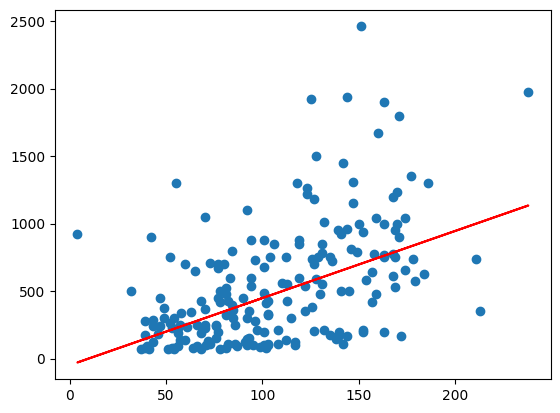

In [240]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [256]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0])) #LİNEARREGRESOYN MODELİNİ OLUSTUROYURM KIYASALMAK İÇİN

y = -8.814095480334345 + 5.172456135470686 x


In [2]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

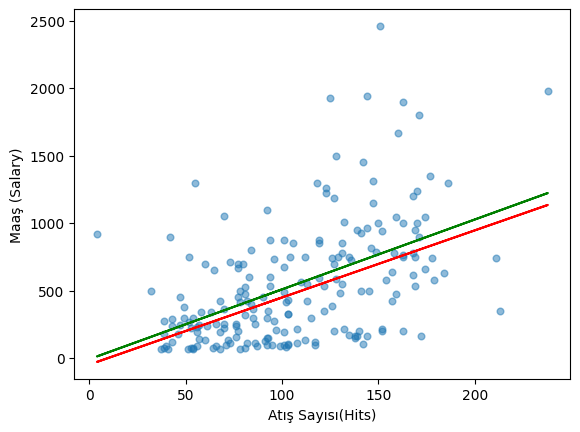

In [247]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')#LİNEAR REGRESYON DOGRUSU
plt.plot(X_train, y_pred, color='r')#SVR DOGRUSU

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

In [248]:
#TAHMİN SVR

In [319]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [320]:
svr_model.predict([[91]])

array([403.52804878])

In [321]:
y_pred = svr_model.predict(X_test)

In [322]:
np.sqrt(mean_squared_error(y_test, y_pred))# HATA ORANI 459 LİNEAR REGRESYONDAN AZ

459.0187960365147

In [258]:
#MODEL TUNİNG(OPTİMİZASYON GİBİ)-GridSeacrh,cross_value

In [281]:
svr_model

SVR(kernel='linear')

In [323]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [324]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [325]:
svr_tuned = SVR(kernel="linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)


In [326]:
y_pred = svr_tuned.predict(X_test)

In [327]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [3]:
# DOĞRUSAL OLMAYAN SVR MODELİ

In [9]:
np.random.seed(3)

In [14]:
x_sim=np.random.uniform(2,10,145)
y_sim=np.sin(x_sim)+np.random.normal(0,0.4,145)

In [16]:
x_outliers=np.arange(2.5,5,0.5)
y_outliers=-5*np.ones(5)
x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))

In [17]:
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [19]:
from sklearn.linear_model import LinearRegression #LİNEAR REGRESYON MODELİNİ EĞİT VE TAHMİN YAPTIR
lr = LinearRegression()
lr.fit(np.sin(x_sim[:,np.newaxis]),y_sim)
lr_pred=lr.predict(np.sin(x_sim[:,np.newaxis]))

In [35]:
from sklearn.svm import SVR
eps = 0.1
svr=SVR(kernel="rbf",epsilon=eps)#rbf modelini eğittik rasgele değerler ile
svr.fit(x_sim[:,np.newaxis],y_sim)
svr_pred=svr.predict(x_sim[:,np.newaxis])

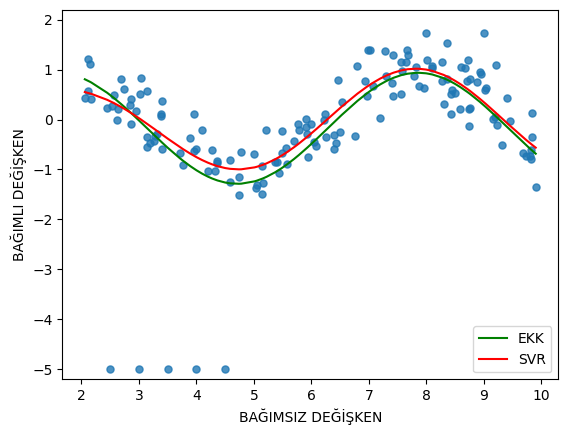

In [34]:
plt.scatter(x_sim,y_sim,alpha=0.8,s=26)
plt_lr,=plt.plot(x_sim,lr_pred,color="g")#linear regresyon tahmin doğrusu çiz
plt_svr,=plt.plot(x_sim,svr_pred,color="red")#svr tahmin doğrusu çiz
plt.xlabel("BAĞIMSIZ DEĞİŞKEN")
plt.ylabel("BAĞIMLI DEĞİŞKEN")
plt.ylim(-5.2, 2.2)
plt.legend([plt_lr, plt_svr], ['EKK', 'SVR'], loc = 4);#loc=4 ile sağ en alt köşeye yerleştir legendi

In [48]:
svr_rbf=SVR(kernel="rbf").fit(X_train,y_train)

In [49]:
rbf_pred=svr_rbf.predict(X_test)

In [51]:
np.sqrt(mean_squared_error(y_test,rbf_pred))

460.0032657244849

In [56]:
#MODEL TUNİNG----- PERFORMANS ARTTIRMA----- #parametre ,hiperparametre değiştirerek
#NOT: svr_cv_model, cv modeli tuning uygulanmış model demek,belirtiyoruz yani

In [55]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}

In [58]:
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [69]:
svr_cv_model.best_params_# {C:50}

{'C': 50}

In [72]:
pd.Series(svr_cv_model.best_params_)[0]# en iyi 50 C değerine göre hipermarametre en iyi sonuc verir d model diyor

50

In [62]:
#svr_tuned modeli C ye göre güncelle tekrar en iyisi

In [73]:
svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [65]:
y_pred=svr_tuned.predict(X_test)

In [66]:
np.sqrt(mean_squared_error(y_test,y_pred))

428.00406888095694

In [74]:
#NKOREGRESSOR MULTİLAYER PERCEPTRON REGRESSİON

In [75]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [76]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [86]:
X_train_scaled = scaler.transform(X_train)

In [83]:
X_test_scaled = scaler.transform(X_test)

In [87]:
from sklearn.neural_network import MLPRegressor

In [88]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [89]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [91]:
mlp_pred=mlp_model.predict(X_test_scaled)

In [92]:
mlp_pred

array([ 90.71908708, 185.30023298, 320.81091663,  85.26787089,
        83.50067868,  48.66782898,  82.12125034,  79.3515975 ,
       346.77545382, 144.40856313, 137.75078549, 334.05562009,
        81.46515322, 146.30486214,  29.06761832, 206.2184275 ,
       241.62500186,  60.61307993, 287.74158318,  49.98315854,
        30.22741266, 200.08471343,  80.3144198 ,  65.02500353,
       206.3676458 ,  65.74795705, 300.09713339,  34.13800927,
        95.03920371,  63.63057382,  65.22029465,  90.92689173,
        28.73114303, 100.71243381,  47.08518521, 164.21521185,
       537.5862399 ,  33.00839543,  78.39844691,  49.45259164,
        64.56255972,  40.74487273,  33.19727865,  31.20458531,
       350.54616081, 156.25691458,  39.31161409,  48.39846509,
        53.2310621 , 159.81237835, 156.13717728,  35.68889296,
       150.52907217,  52.79137118,  57.12118491, 127.22699939,
        40.32536504, 189.93499421,  63.69036444, 522.49209281,
       555.32162529,  61.1690641 , 195.74006595,  26.61

In [93]:
np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

In [94]:
#MLP TUNİNNG İŞLEMİ

In [97]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [100]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params, cv = 10)
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [101]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [102]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [103]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [104]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [105]:
np.sqrt(mean_squared_error(y_test, y_pred))

359.43353034258126

In [ ]:
#CART MODEL KARAR AĞAÇLARI MODELİ

In [13]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [14]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [15]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [17]:
cart_model

DecisionTreeRegressor()

In [18]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

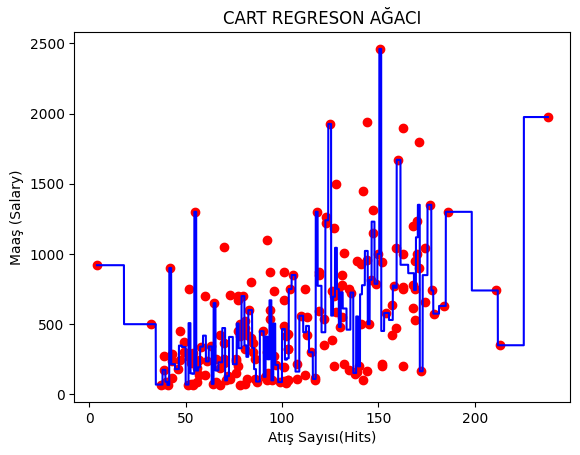

In [33]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [35]:
from skompiler import skompile

In [37]:
print(skompile(cart_model.predict).to('python/code'))

((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else 

In [38]:
x = [91]
cart_model.predict([[91]])

array([125.])

In [26]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [27]:
y_pred =cart_model.predict(X_test)

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [ ]:
#MODEL TUNİNG

In [ ]:
#RANDOM FOREST(RF)

In [4]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
rf_model=RandomForestRegressor(random_state=42)

In [12]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#TAHMİN

In [34]:
y_pred=rf_model.predict(X_test)

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

In [ ]:
#MODEL TUNİNG

In [ ]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [36]:
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1) #n_jobs paralel(eş zamanlı) arama yapmayı tam performanslı cpu kullanımı sağlaması için

In [ ]:
rf_cv_model.fit(X_train,y_train)

In [ ]:
rf_cv_model.best_params_#max_depth=8,max_features=3,n_estimators=200 değerlerini verir y performansı iyi yapan bu değerlermiş

In [38]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [39]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [40]:
y_pred=rf_tuned.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

346.84965750182994

In [42]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

In [48]:
rf_tuned.feature_importances_

array([0.04434561, 0.05163463, 0.03275928, 0.04501578, 0.06175769,
       0.05653388, 0.0381755 , 0.11483219, 0.1228145 , 0.05716317,
       0.10237228, 0.09876666, 0.08290558, 0.0499845 , 0.01419688,
       0.01612967, 0.00236243, 0.00433093, 0.00391885])

In [49]:
X_train.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [43]:
Importance

,Importance
AtBat,4.434561
Hits,5.163463
HmRun,3.275928
Runs,4.501578
RBI,6.175769
Walks,5.653388
Years,3.817550
CAtBat,11.483219
CHits,12.281450
CHmRun,5.716317


In [64]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = False)#artan sırada sıralar 

,Importance
CHits,12.281450
CAtBat,11.483219
CRuns,10.237228
CRBI,9.876666
CWalks,8.290558
RBI,6.175769
CHmRun,5.716317
Walks,5.653388
Hits,5.163463
PutOuts,4.998450


Text(0.5, 0, 'Değişken Önem Düzeyleri')

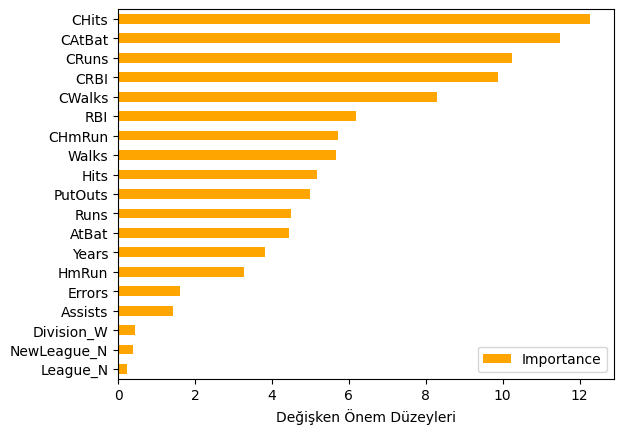

In [57]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "orange")

plt.xlabel("Değişken Önem Düzeyleri")

In [12]:
#GRADİENT BOOSTİNG

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

In [18]:
y_pred=gbr.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test,y_pred))

349.83734820952736

In [20]:
#MODEL TUNİNG

In [1]:
gbr_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [ ]:
gbr = GradientBoostingRegressor()
gbr_cv_model=GridSearchCV(gbr,gbr_params,cv=10,n_jobs=-1,verbose=2)
gbr_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


In [ ]:
gbr_cv_model.best_params_

In [ ]:
gbr_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbr_tuned = gbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))